In [2]:
import numpy as np
import pandas as pd
import matplotlib
import missingno as msno
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation
import heapq 

## 1. The LASSO and Boosting for Regression

### （b）Use a data imputation technique to deal with the missing values in the data set.

In [158]:
data = pd.read_csv('data1.csv',header=0)
df = data.iloc[:,5:]

In [159]:
df = df.replace(r'\?',np.nan,regex=True)
#missingdata_df = df.columns[df.isnull().any()].tolist()
#msno.matrix(df[missingdata_df])
imp = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

In [160]:
df1=pd.DataFrame(imp.fit_transform(df))
df1.columns = df.columns

### (c)Plot a correlation matrix for the features in the data set.

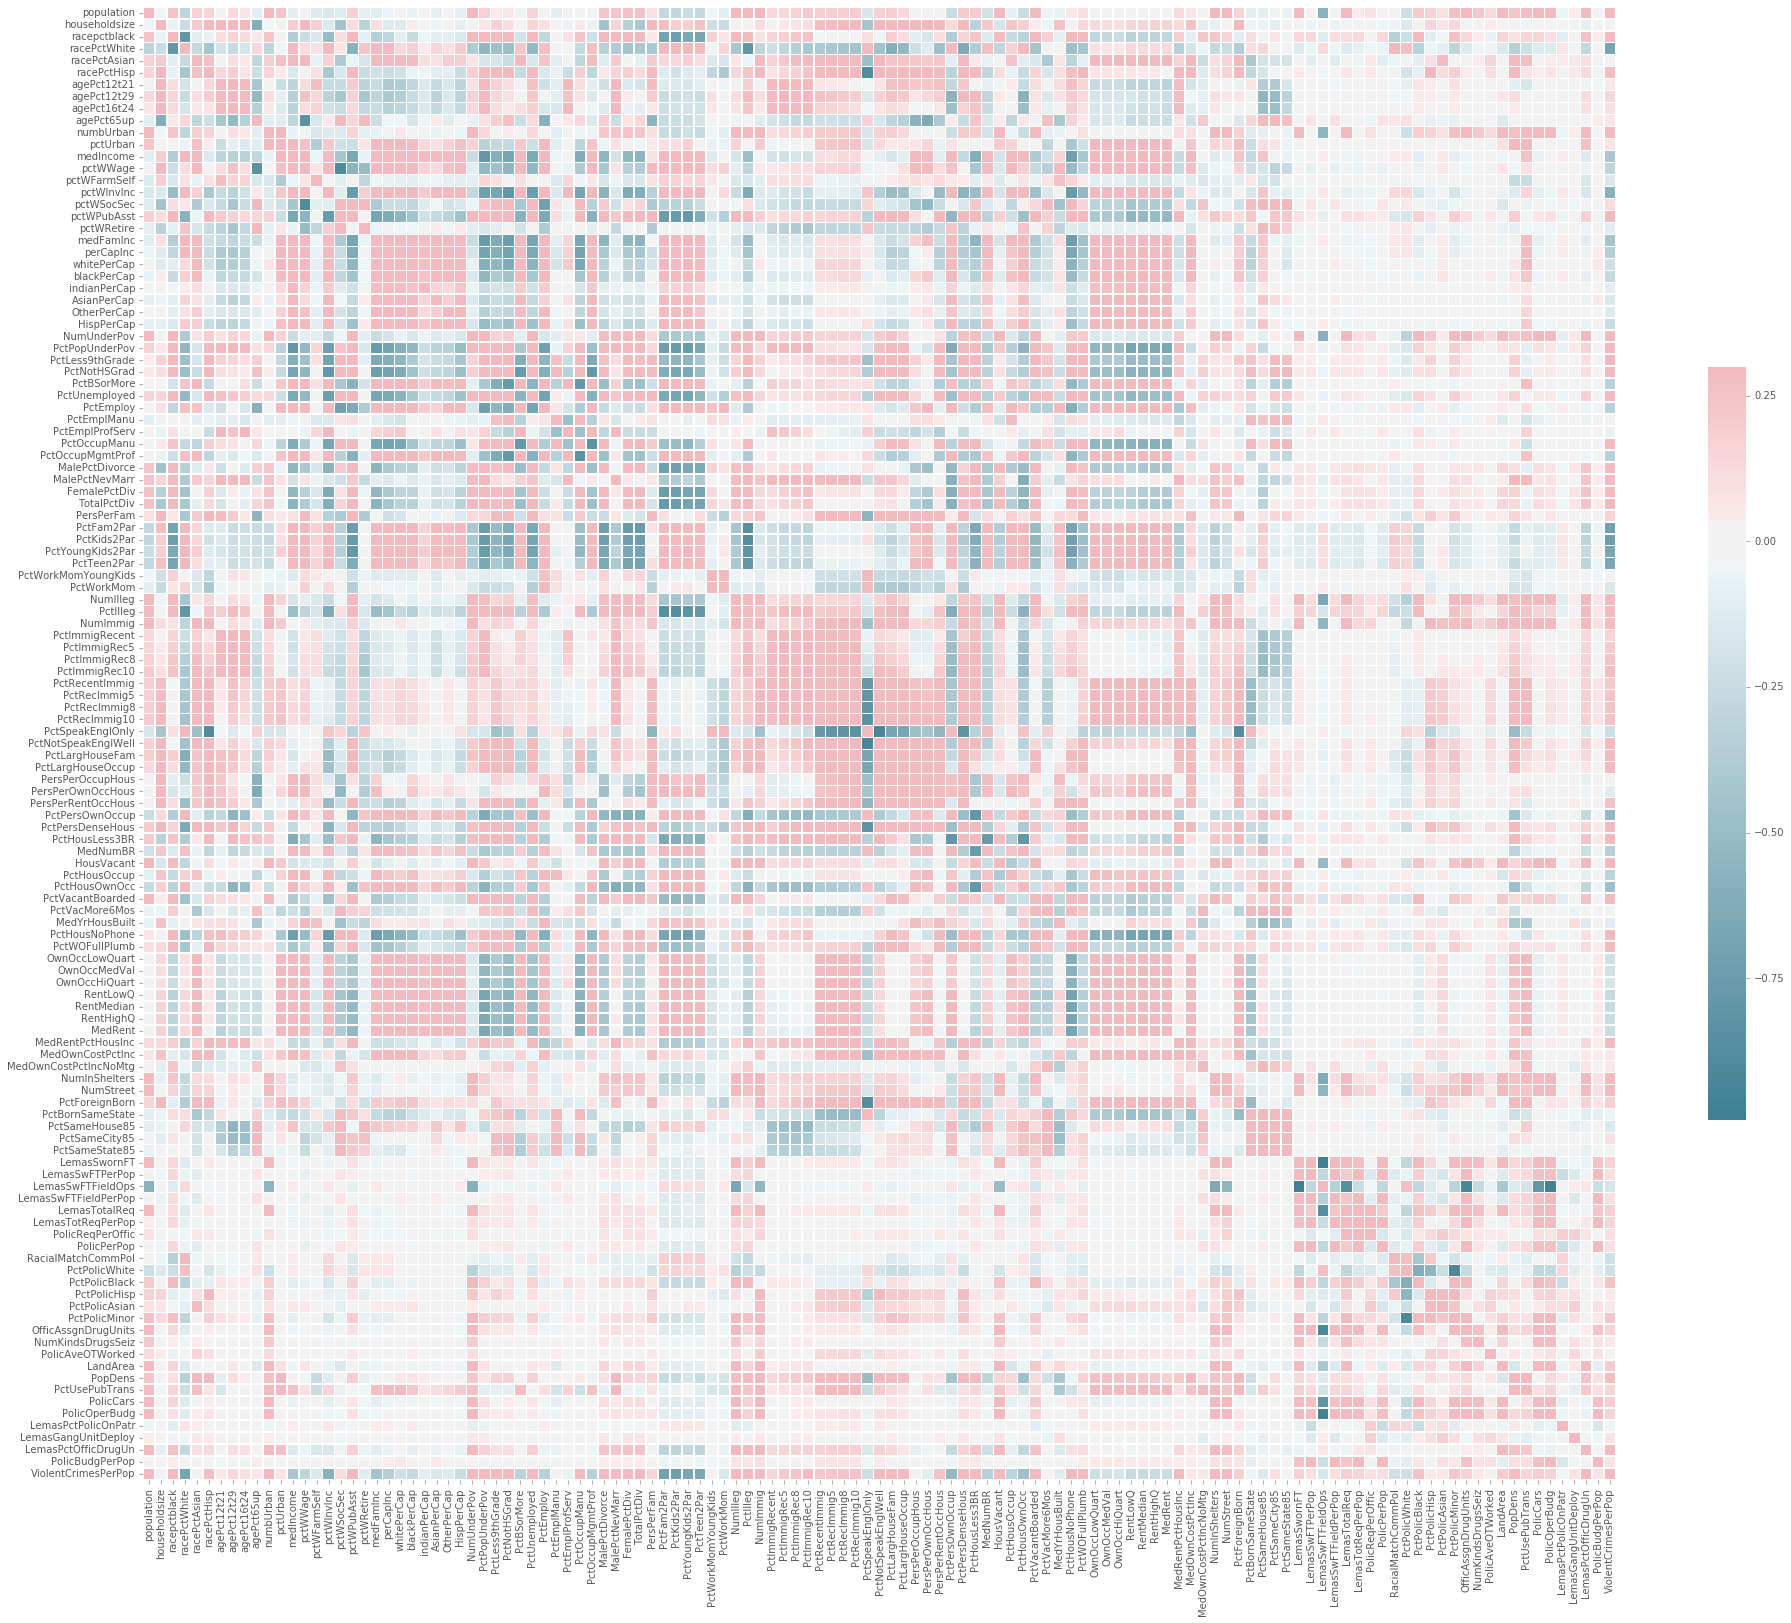

In [161]:

f, ax = plt.subplots(figsize=(33, 27))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df1.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#print(df1.corr())
#plt.matshow(df1.corr())

### (d) Calculate the Coefficient of Variation CV 

In [162]:
var = variation(df1, axis=0)
print(var)

[2.22621097 0.35402431 1.42399782 0.32772012 1.35504241 1.60754934
 0.36987768 0.29166895 0.50060459 0.41368372 2.02684926 0.64371862
 0.58960405 0.32815251 0.70190367 0.36315175 0.3609773  0.70117631
 0.34368539 0.53775351 0.5556813  0.51731265 0.59691438 0.81469002
 0.60966547 0.67589028 0.48199626 2.32692701 0.75275463 0.67704578
 0.5309344  0.58953025 0.55898908 0.34978468 0.51243591 0.40390999
 0.51487693 0.43025674 0.39706031 0.40467117 0.35852862 0.37189402
 0.31534128 0.33316088 0.33450431 0.33309889 0.3296081  0.33911072
 0.33476461 3.0356268  0.91945157 2.90991671 0.6782429  0.58960916
 0.50472656 0.45608468 1.28517371 1.28298155 1.26207933 1.26582089
 0.28663762 1.45157023 0.73223133 0.75694193 0.36623885 0.31838726
 0.47114416 0.34896545 1.12737047 0.34296854 0.80866812 1.94917903
 0.27009253 0.3360659  1.05945351 0.43843759 0.47539849 0.91939513
 0.84317813 0.85734786 0.88628753 0.8800096  0.63836229 0.56686398
 0.59116706 0.56168898 0.34209395 0.4146413  0.47116503 3.4478

### (e) Pick 11 features with the highest CV, the print values including the label called"ViolentCrimesPerPop",draw scatter plots and box plots.
#### Just by the scatter plots I can't draw conclusions about significance of those features because from the scatter plots I draw there are no significante relationship among the label and the features.

In [163]:

df_f = pd.DataFrame()
ind = heapq.nlargest(11, range(len(var)), var.take)
print(ind)
for i in ind:
    df_f[df1.columns.values[i]] = df1.iloc[:,i]
df_f[df1.columns.values[122]] = df1.iloc[:,122]


[90, 89, 49, 51, 120, 27, 0, 10, 71, 113, 5]


In [164]:
print(df_f.columns.values)

['NumStreet' 'NumInShelters' 'NumIlleg' 'NumImmig' 'LemasPctOfficDrugUn'
 'NumUnderPov' 'population' 'numbUrban' 'HousVacant' 'LandArea'
 'racePctHisp' 'ViolentCrimesPerPop']


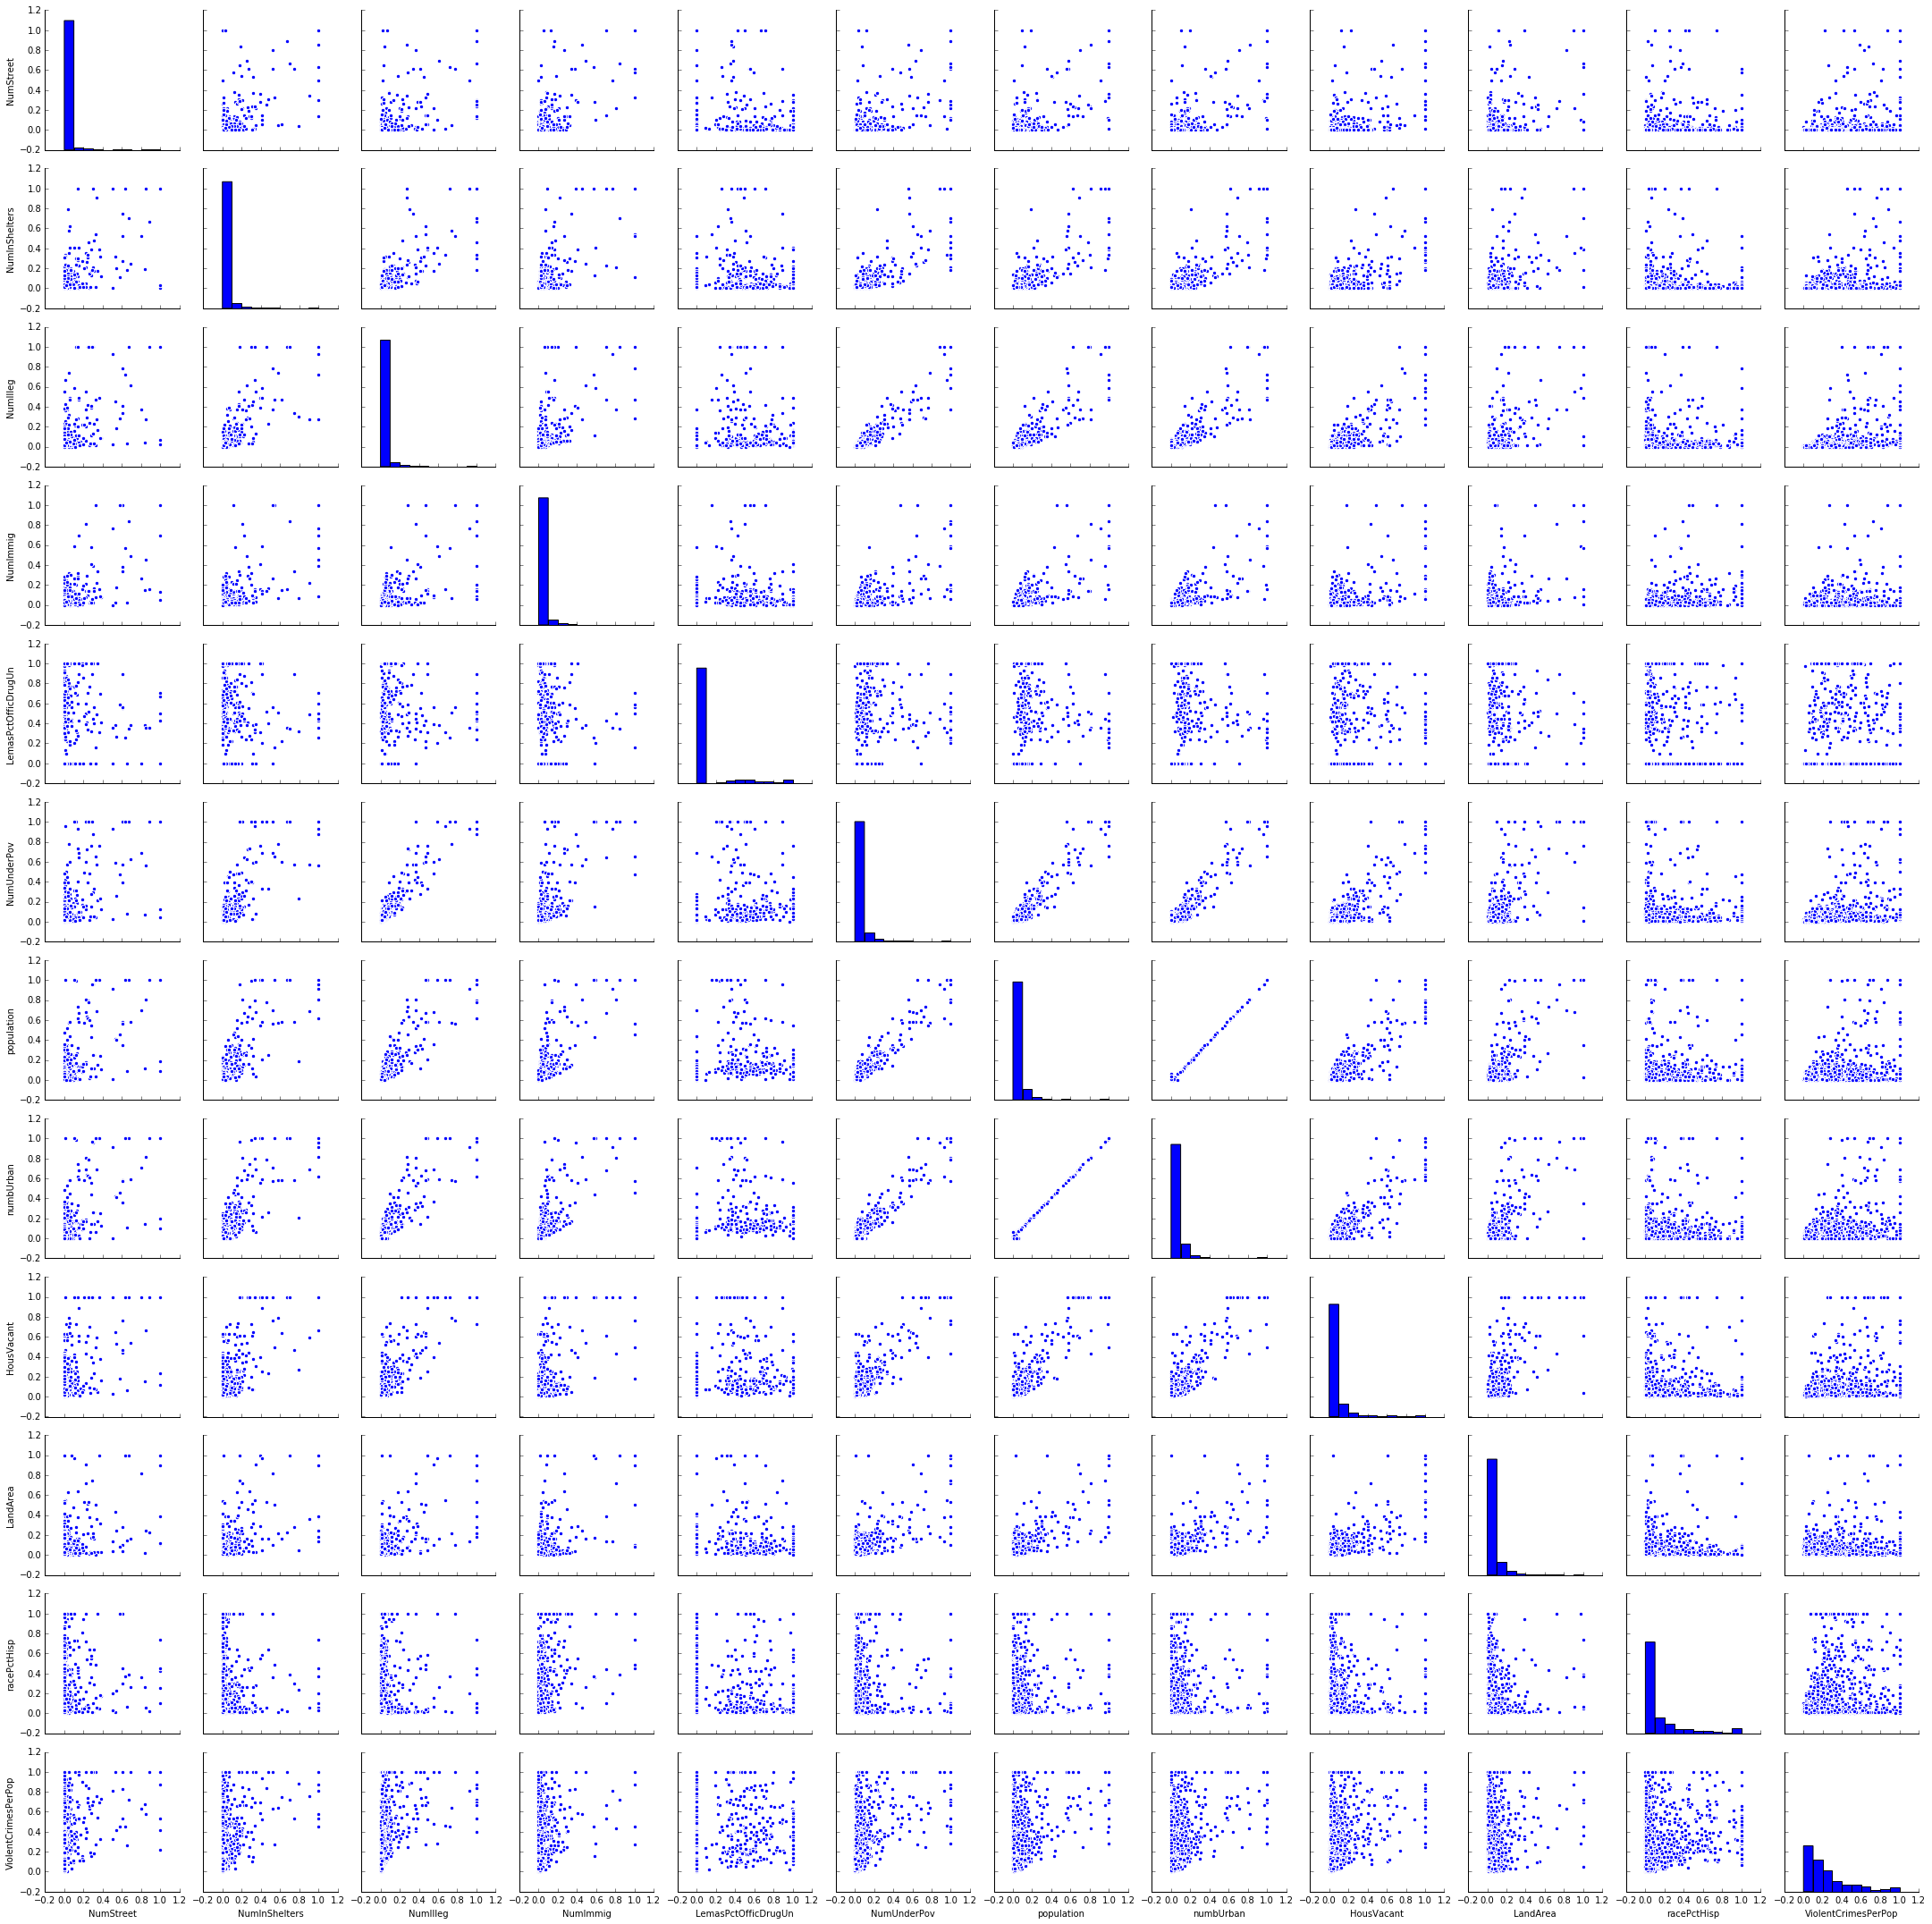

In [14]:
sns.pairplot(df_f)

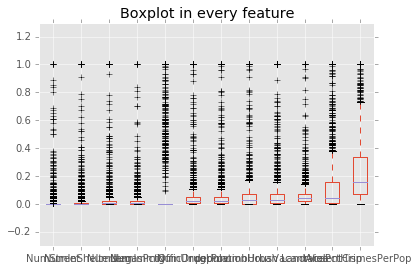

In [150]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6)) 
df_f.plot.box(title="Boxplot in every feature") 
plt.ylim(-0.3,1.3)
plt.show()
#Just by the scatter plots, I can't draw conclusions about significance of those features.
#Because there seems no significant relationship with the feature and the goals.

### (f)Fit a linear model using least squares
#### According to the model the MSE in the test data is: 0.015423453412307414

In [165]:
#f
#state+county+community+communityname+fold+population+householdsize+racepctblack+racePctWhite+racePctAsian+racePctHisp+agePct12t21+agePct12t29+agePct16t24+agePct65up+numbUrban+pctUrban+medIncome+pctWWage+pctWFarmSelf+pctWInvInc+pctWSocSec+pctWPubAsst+pctWRetire+medFamInc+perCapInc+whitePerCap+blackPerCap+indianPerCap+AsianPerCap+OtherPerCap+HispPerCap+NumUnderPov+PctPopUnderPov+PctLess9thGrade+PctNotHSGrad+PctBSorMore+PctUnemployed+PctEmploy+PctEmplManu+PctEmplProfServ+PctOccupManu+PctOccupMgmtProf+MalePctDivorce+MalePctNevMarr+FemalePctDiv+TotalPctDiv+PersPerFam+PctFam2Par+PctKids2Par+PctYoungKids2Par+PctTeen2Par+PctWorkMomYoungKids+PctWorkMom+NumIlleg+PctIlleg+NumImmig+PctImmigRecent+PctImmigRec5+PctImmigRec8+PctImmigRec10+PctRecentImmig+PctRecImmig5+PctRecImmig8+PctRecImmig10+PctSpeakEnglOnly+PctNotSpeakEnglWell+PctLargHouseFam+PctLargHouseOccup+PersPerOccupHous+PersPerOwnOccHous+PersPerRentOccHous+PctPersOwnOccup+PctPersDenseHous+PctHousLess3BR+MedNumBR+HousVacant+PctHousOccup+PctHousOwnOcc+PctVacantBoarded+PctVacMore6Mos+MedYrHousBuilt+PctHousNoPhone+PctWOFullPlumb+OwnOccLowQuart+OwnOccMedVal+OwnOccHiQuart+RentLowQ+RentMedian+RentHighQ+MedRent+MedRentPctHousInc+MedOwnCostPctInc+MedOwnCostPctIncNoMtg+NumInShelters+NumStreet+PctForeignBorn+PctBornSameState+PctSameHouse85+PctSameCity85+PctSameState85+LemasSwornFT+LemasSwFTPerPop+LemasSwFTFieldOps+LemasSwFTFieldPerPop+LemasTotalReq+LemasTotReqPerPop+PolicReqPerOffic+PolicPerPop+RacialMatchCommPol+PctPolicWhite+PctPolicBlack+PctPolicHisp+PctPolicAsian+PctPolicMinor+OfficAssgnDrugUnits+NumKindsDrugsSeiz+PolicAveOTWorked+LandArea+PopDens+PctUsePubTrans+PolicCars+PolicOperBudg+LemasPctPolicOnPatr+LemasGangUnitDeploy+LemasPctOfficDrugUn+PolicBudgPerPop
train = df_f.iloc[:1495]
test = df_f.iloc[1496:]
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

trainfull = df1.iloc[:1495]
testfull = df1.iloc[1496:]
x_train1 = trainfull.iloc[:,:-1]
y_train1 = trainfull.iloc[:,-1]
x_test1 = testfull.iloc[:,:-1]
y_test1 = testfull.iloc[:,-1]

In [166]:
lr_model = sm.OLS(y_train1,x_train1).fit()
print(lr_model.summary())
test_predict1 = lr_model.predict(x_test1)
print("MSE in test data:",metrics.mean_squared_error(y_test1,test_predict1))

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.857
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                     68.26
Date:                    一, 22 10 2018   Prob (F-statistic):               0.00
Time:                         17:50:48   Log-Likelihood:                 955.35
No. Observations:                 1495   AIC:                            -1669.
Df Residuals:                     1374   BIC:                            -1026.
Df Model:                          121                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population          

### (g)  Fit a ridge regression,with λ fit by CV
#### The λ we choose is 1e-4, and MSE in the ridge test data is 0.01663159259999484


In [ ]:
from sklearn.linear_model import RidgeCV
clf1 = RidgeCV(alphas=[1e-4,1e-3, 1e-2, 1e-1, 1,10,100]).fit(x_train1, y_train1)
clf1.score(x_train1, y_train1)
test_predict2 = clf1.predict(x_test1)

In [169]:
print("MSE in ridge test data:0.01663159259999484")

MSE in ridge test data:0.01663159259999484


### (h) fit lasso with λ fit by CV
### According to the coef in the clf2 we could find that the feature we choose:
#### [acepctblack,racePctAsian,agePct12t21,agePct12t29,agePct65up,pctUrban,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,whitePerCap,blackPerCap,i\ndianPerCap,AsianPerCap,OtherPerCap,HispPerCap,PctPopUnderPov,PctLess9thGrade,PctBSorMore,PctEmploy,PctEmplManu,PctOccupManu,MalePctDivorce,MalePctNevMarr,FemalePctDiv,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRec10,PctRecImmig10,PctNotSpeakEnglWell,PctLargHouseOccup,PersPerOccupHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,RentLowQ,,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctSameCity85,LemasSwFTFieldPerPop,LemasTotalReq,PolicReqPerOffic,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,LemasPctPolicOnPatr,LemasGangUnitDeploy]

### Repeat with the normailized model,

### When normalize the mse in lasso getting better, not normalize the test mse is 0.016865334215106203
### but when normalized the test mse is 0.0008283817496998506


In [23]:
from sklearn.linear_model import LassoCV
clf2 = LassoCV(cv=5,alphas=[1e-4,1e-3, 1e-2, 1e-1, 1,10,100]).fit(x_train1, y_train1)
print(clf2.alpha_)
test_predict3 = clf2.predict(x_test1)
#print(clf2.get_params(deep=True))
print("MSE in lasso not normalized test data:",metrics.mean_squared_error(y_test1,test_predict3))
print(clf2.coef_)

0.0001
MSE in lasso not normalized test data: 0.016865334215106203
[-0.          0.          0.27296362 -0.         -0.01780528  0.
  0.07586748 -0.29105433  0.          0.00391265 -0.          0.04100302
  0.         -0.09306937  0.02902649 -0.11007924  0.05934492  0.04189044
 -0.10981938  0.         -0.         -0.06933365 -0.02253866 -0.03192816
  0.0292175   0.02358993  0.02569541 -0.         -0.15017026 -0.02125233
  0.          0.01731232 -0.          0.15499962 -0.0192161   0.
  0.01654781  0.          0.13262511  0.15077656 -0.09558806 -0.
  0.         -0.         -0.19799568 -0.03604992 -0.01144479  0.
 -0.13464293 -0.06373687  0.09559594 -0.08141612 -0.         -0.
 -0.         -0.0056406  -0.          0.          0.          0.03946463
 -0.         -0.08101361 -0.         -0.08939862  0.07333351 -0.
 -0.         -0.06440291  0.2311046   0.06494543  0.0059842   0.13002633
 -0.0595331   0.          0.07471747 -0.06285723 -0.01617108  0.02678922
 -0.02589147 -0.01903028 -0.    

In [24]:
from sklearn.preprocessing import Normalizer

In [25]:
transformer = Normalizer().fit(trainfull)
train2 = pd.DataFrame(transformer.transform(trainfull))
train2.columns = trainfull.columns
transformer1 = Normalizer().fit(testfull)
test2 = pd.DataFrame(transformer.transform(testfull))
test2.columns = testfull.columns

In [26]:
x_train2 = train2.iloc[:,:-1]
y_train2 = train2.iloc[:,-1]
x_test2 = test2.iloc[:,:-1]
y_test2 = test2.iloc[:,-1]

In [27]:
clf3 = LassoCV(cv=5,alphas=[1e-4,1e-3, 1e-2, 1e-1, 1,10,100]).fit(x_train2, y_train2)
print("The best λ we choose is:",clf3.alpha_)
test_predict4 = clf3.predict(x_test2)
print(clf3.coef_)
#print(clf3.get_params(deep=True))
print("MSE in lasso not normalized test data:",metrics.mean_squared_error(y_test2,test_predict4))

The best λ we choose is: 0.0001
[ 0.         -0.          0.1438427  -0.05025939 -0.          0.
 -0.         -0.         -0.          0.          0.          0.02822344
 -0.         -0.         -0.         -0.          0.          0.03278668
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.1511855  -0.          0.          0.
  0.         -0.         -0.30764046 -0.         -0.         -0.
 -0.          0.          0.1171505   0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.         -0.
  0.         -0.          0.09289963  0.         -0.          0.06268289
 -0.05373311 -0.          0.02231965 -0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.      

## (i) fit a PCR model in the training set
### the M we choose is 96 by cross validation, and the test error we obtain is  0.04913231155634511

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
pca = PCA()
X_reduced = pca.fit_transform(scale(x_train1))
pd.DataFrame(pca.components_.T)

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.062561,0.105031,0.195536,0.041082,0.066143,-0.158098,-0.065052,0.011079,-0.046801,-0.102874,...,0.018209,-0.014143,-0.046740,0.096778,0.699703,-0.016448,-0.015067,-0.023890,0.017419,8.944237e-16
1,-0.005292,0.109847,-0.158026,0.103519,0.191351,0.069649,-0.075291,-0.016604,0.030374,-0.047775,...,0.019146,0.004880,-0.002012,0.000912,0.002541,0.005904,-0.016217,-0.003353,-0.003974,-8.984243e-18
2,0.107609,0.006099,0.066937,-0.024471,-0.031344,0.071665,-0.164003,-0.260053,0.077963,0.034329,...,-0.002205,-0.005578,-0.007600,0.007741,-0.001928,-0.004328,-0.003603,0.006455,-0.000502,2.843203e-16
3,-0.117094,-0.111101,0.014900,-0.005961,0.039316,-0.037487,0.104138,0.192552,-0.075248,-0.029926,...,-0.045763,-0.004960,-0.012608,0.034664,-0.003903,0.002262,-0.017870,0.006122,-0.002518,3.759016e-16
4,-0.043445,0.161313,-0.022700,-0.050757,-0.055640,-0.047410,0.019618,0.002599,-0.024781,0.063134,...,-0.005090,-0.013487,0.003519,-0.002321,0.000320,0.009638,0.002174,0.000360,0.004827,5.332659e-17
5,0.069487,0.151110,-0.124923,0.080969,-0.018360,-0.035993,0.081137,0.081390,0.060399,-0.038940,...,-0.012788,-0.003511,-0.006943,-0.003225,0.004141,0.003709,-0.007161,0.008438,0.007579,4.542802e-17
6,0.058471,0.029804,-0.082063,-0.107717,0.226794,0.113287,-0.154006,0.092868,-0.013080,0.005108,...,0.077816,-0.002344,0.007713,0.012301,-0.003632,-0.008038,0.010258,-0.016949,-0.007205,2.791776e-16
7,0.068548,0.070239,-0.056807,-0.176414,0.183273,0.071753,-0.080217,0.027509,-0.122499,0.005071,...,0.083480,-0.000201,0.026092,-0.021437,0.004890,-0.022548,0.004907,-0.009659,-0.001973,9.311339e-17
8,0.057694,0.044121,-0.038916,-0.186678,0.164932,0.108116,-0.134839,0.110233,-0.083811,0.026009,...,-0.130264,-0.009904,-0.030488,0.001184,-0.010318,0.030483,-0.011685,0.023599,-0.010694,-2.004599e-16
9,0.031116,-0.111267,0.069916,0.040133,-0.238762,0.009905,0.001059,0.198357,0.063905,0.052293,...,0.026208,-0.009322,-0.012853,-0.006701,-0.005200,-0.017397,-0.003226,-0.014879,-0.007253,-3.511037e-17


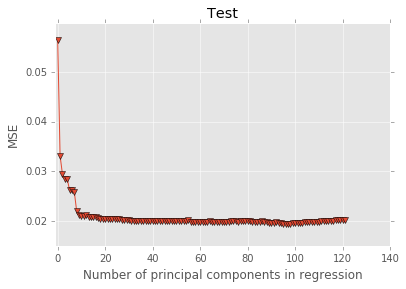

In [30]:
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train1.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 122):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y_train1.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Test')
plt.xlim(xmin=-1);


In [31]:
#print(mse)
print(mse.index(min(mse)))
Xtest_reduced = pca.fit_transform(scale(x_test1))
pd.DataFrame(pca.components_.T)
score1 = -1*model_selection.cross_val_score(regr, Xtest_reduced[:,:96], y_test1.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
print("The test error we obtain from the test data is:",score1)

96
The test error we obtain from the test data is: 0.04913231155634511


## (j) fit a boosting tree to the data.
### Determine the α is 1e-5, the MSE we have in test data: 0.017683260938327075

In [29]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [30]:
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0}
xgb_model = XGBRegressor(**other_params)

test_params = {
 'alpha':[1e-5,1e-4,1e-3, 1e-2, 1e-1, 1,10,100]
}

model = GridSearchCV(cv=5,estimator = xgb_model,param_grid = test_params)
model.fit(x_train1,y_train1)
print(model.best_params_)

{'alpha': 1e-05}


In [31]:
#According to the CV we choose α=0.00001 as the parameter 
other_params1 = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 1e-5}
xgb_model1 = XGBRegressor(**other_params1)
xgtrain = xgb.DMatrix(x_train1.values, y_train1.values)
xgb_model1.fit(x_train1, y_train1,eval_metric='auc')
train_pre = xgb_model1.predict(x_train1)
test_pre = xgb_model1.predict(x_test1)
print("MSE in test data:",metrics.mean_squared_error(y_test1,test_pre))

MSE in test data: 0.017683260938327075


# HOMEWORK 2
## 

In [3]:
#read the dataset
h2_data1 = pd.read_csv('aps_failure_training_set.csv',header=0)
h2_data2 = pd.read_csv('h2_test_set.csv',header=0)
result = pd.concat([h2_data1,h2_data2],)


## (b):Data preparation

### i:There are 3 ways to deal with the missing value.
#### 1 .Use attribute mean:Replace missing values of an attribute with the mean (or median if its discrete) value for that attribute in the database.
#### 2.Use attribute mean for all samples belonging to the same class:We can limit the calculations to the relevant class to make the value more relevant to the row we’re looking at.
#### 3.Use a data mining algorithm to predict the most probable value: Like Bayesian formalism, decision trees, clustering algorithms to deal with the missing value.
#### I choose the first way to use the attribute mean to deal with the missing value.

In [4]:
result = result.replace(r'na',np.nan,regex=True)
missingdata_result = result.columns[result.isnull().any()].tolist()
result = result.replace('pos',0,regex=True)
result = result.replace('neg',1,regex=True)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
result1=pd.DataFrame(imp.fit_transform(result))
result1.columns = result.columns
result1['class']=result1['class'].replace([1.0,0],['neg','pos'])
#result1.columns = result.columns

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## (b)
### ii:Calculate the coefficient of variation in each feature

In [5]:
x = result1.iloc[:,1:]
y= result1.iloc[:,0]
var = variation(x, axis=0)
print(var)

[  4.32857936   2.17825826   2.16763905 206.72013957  22.29352376
  18.20889571  91.46005188  42.08406566  17.62579261   8.75324193
   5.47508023   2.96421043   2.3525724    2.81247947   6.2749388
  32.16684571   2.31552486  18.50618638  43.14419572  78.62247048
   9.11193127   9.0671358    2.25421182   2.2760995    3.08586459
   2.85345254  10.56913279 113.88200615  23.18690738  86.08507116
   5.73044766   3.8590096   40.90224966  49.24831058  38.34206692
  28.32984924  33.03991459  12.00898155   3.02190155   3.24987397
   3.94375532  77.46059169   9.01981026   7.37491861  12.05034852
   7.5655194    2.83779628   3.06662893   8.70434915  15.38205557
  22.41473126  77.99904323   2.68854544   2.64752782   2.88691619
   2.72995632   2.64141022   2.70332199   2.99691913   2.82208042
   6.70502527   9.52592774   2.40993725   6.69727311   5.08585082
   6.35540973   7.05244583   2.31345084   2.62496658   3.0106525
   3.57963009   0.73016082   0.73235958   0.59427393   0.51760949
   0.4628960

## (b)
### iii:Plot a correlation matrix

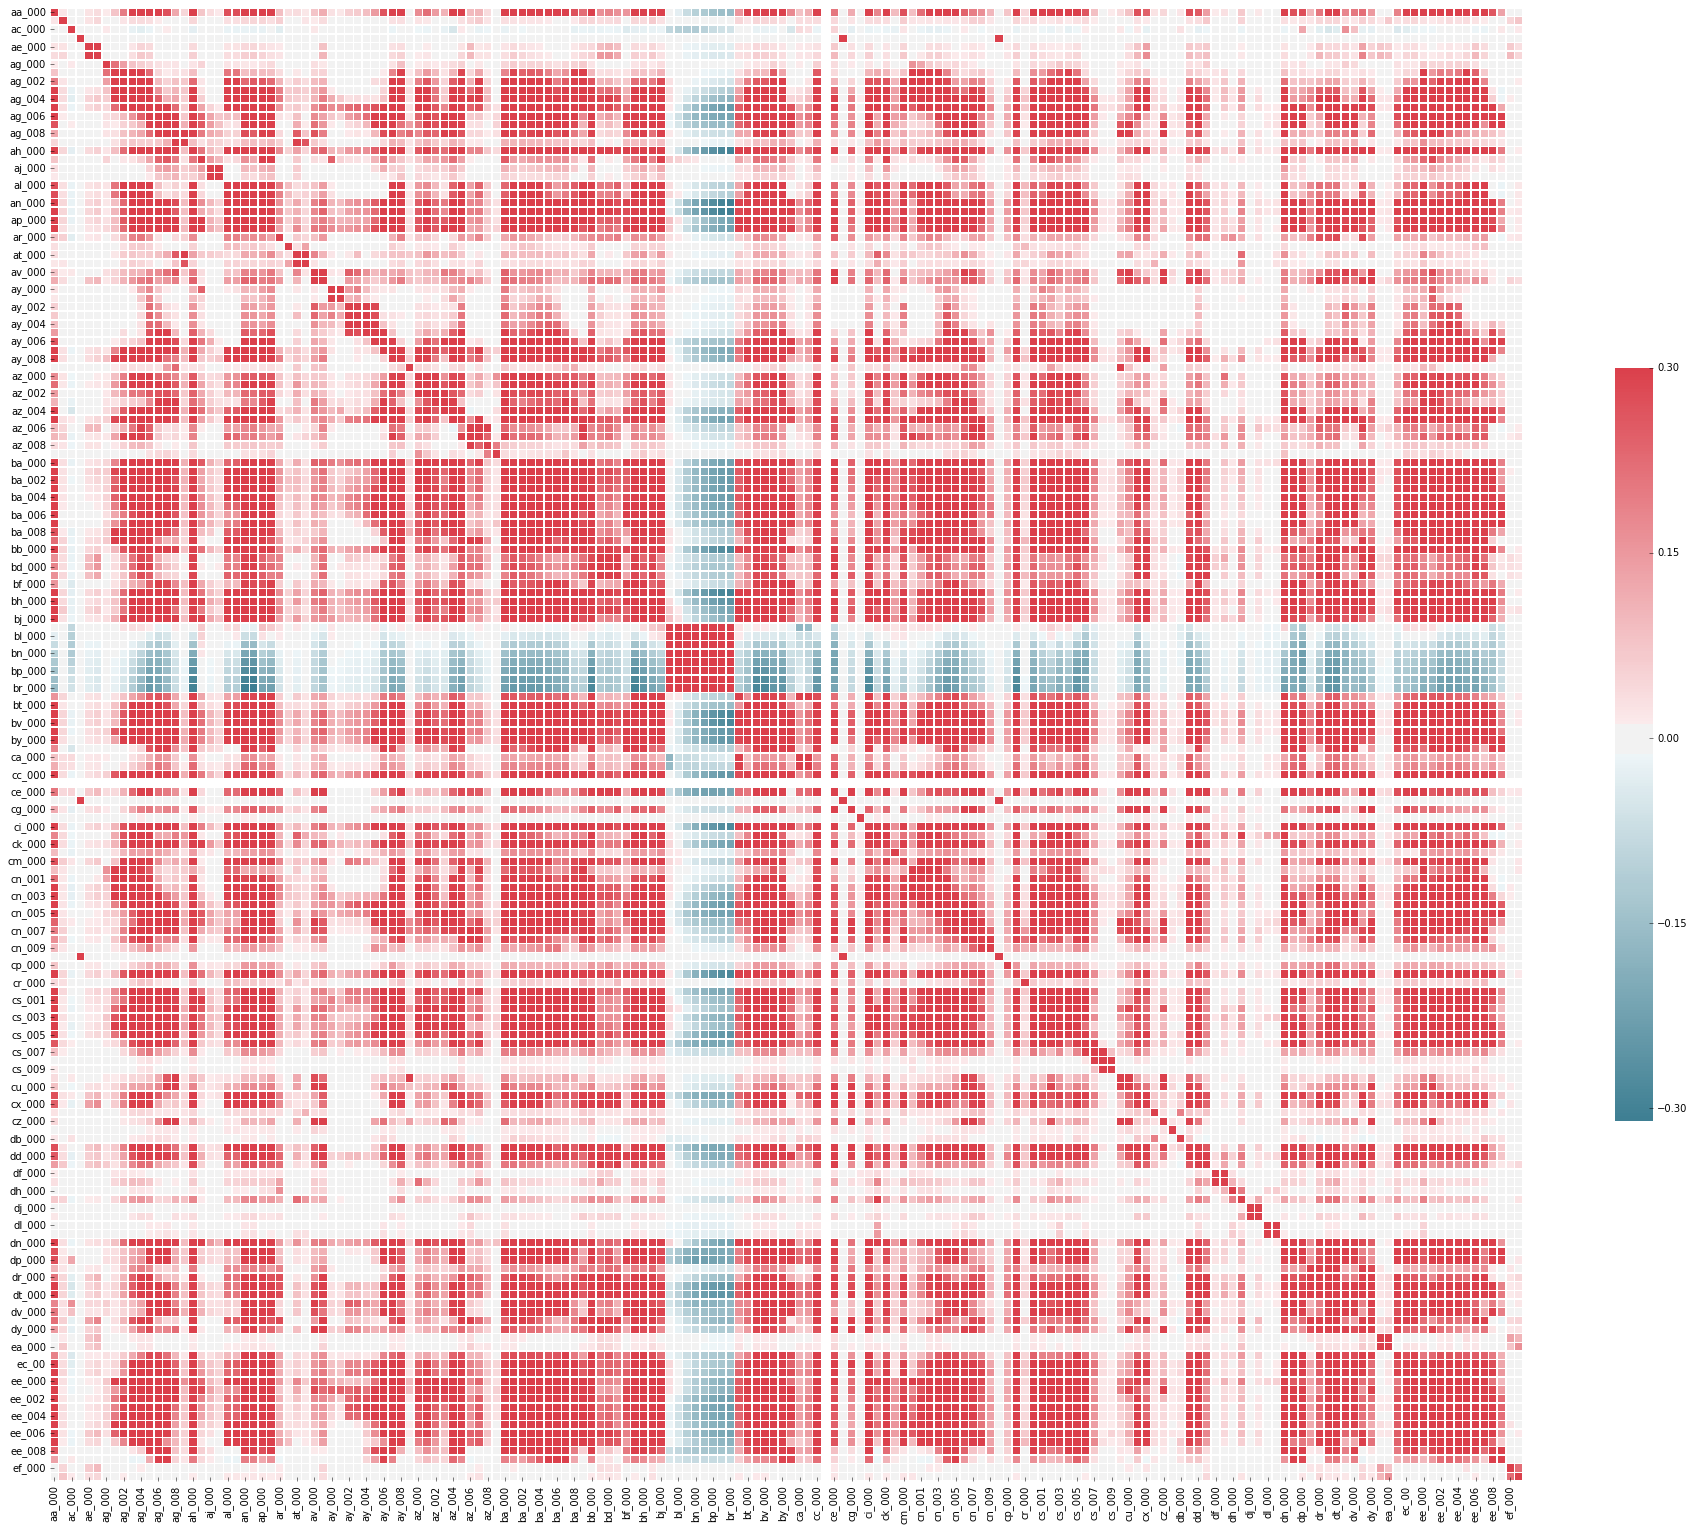

In [13]:
#(b)iii:Plot a correlation matrix
f, ax = plt.subplots(figsize=(33, 27))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(x.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## (b)
### iv:Pick 13 features with highest CV and make scatter plots and box plots
### From the features I can't draw significance of those features just from the scatter plot

In [6]:
#(b)iv:Pick 13 features with highest CV and make scatter plots and box plots
#From the features I can't draw significance of those features just from the scatter plot
df_f = pd.DataFrame()
df_f1 = pd.DataFrame()
ind = heapq.nlargest(13, range(len(var)), var.take)
print(ind)
for i in ind:
    df_f[x.columns.values[i-1]] = x.iloc[:,i-1]
print("The 13 features we choose:",df_f.columns.values)
df_f[result1.columns.values[0]] = y

[91, 109, 3, 122, 138, 27, 136, 134, 6, 29, 19, 51, 41]
The 13 features we choose: ['ce_000' 'cn_009' 'ac_000' 'cs_008' 'di_000' 'ar_000' 'dg_000' 'de_000'
 'af_000' 'at_000' 'aj_000' 'az_008' 'ay_008']


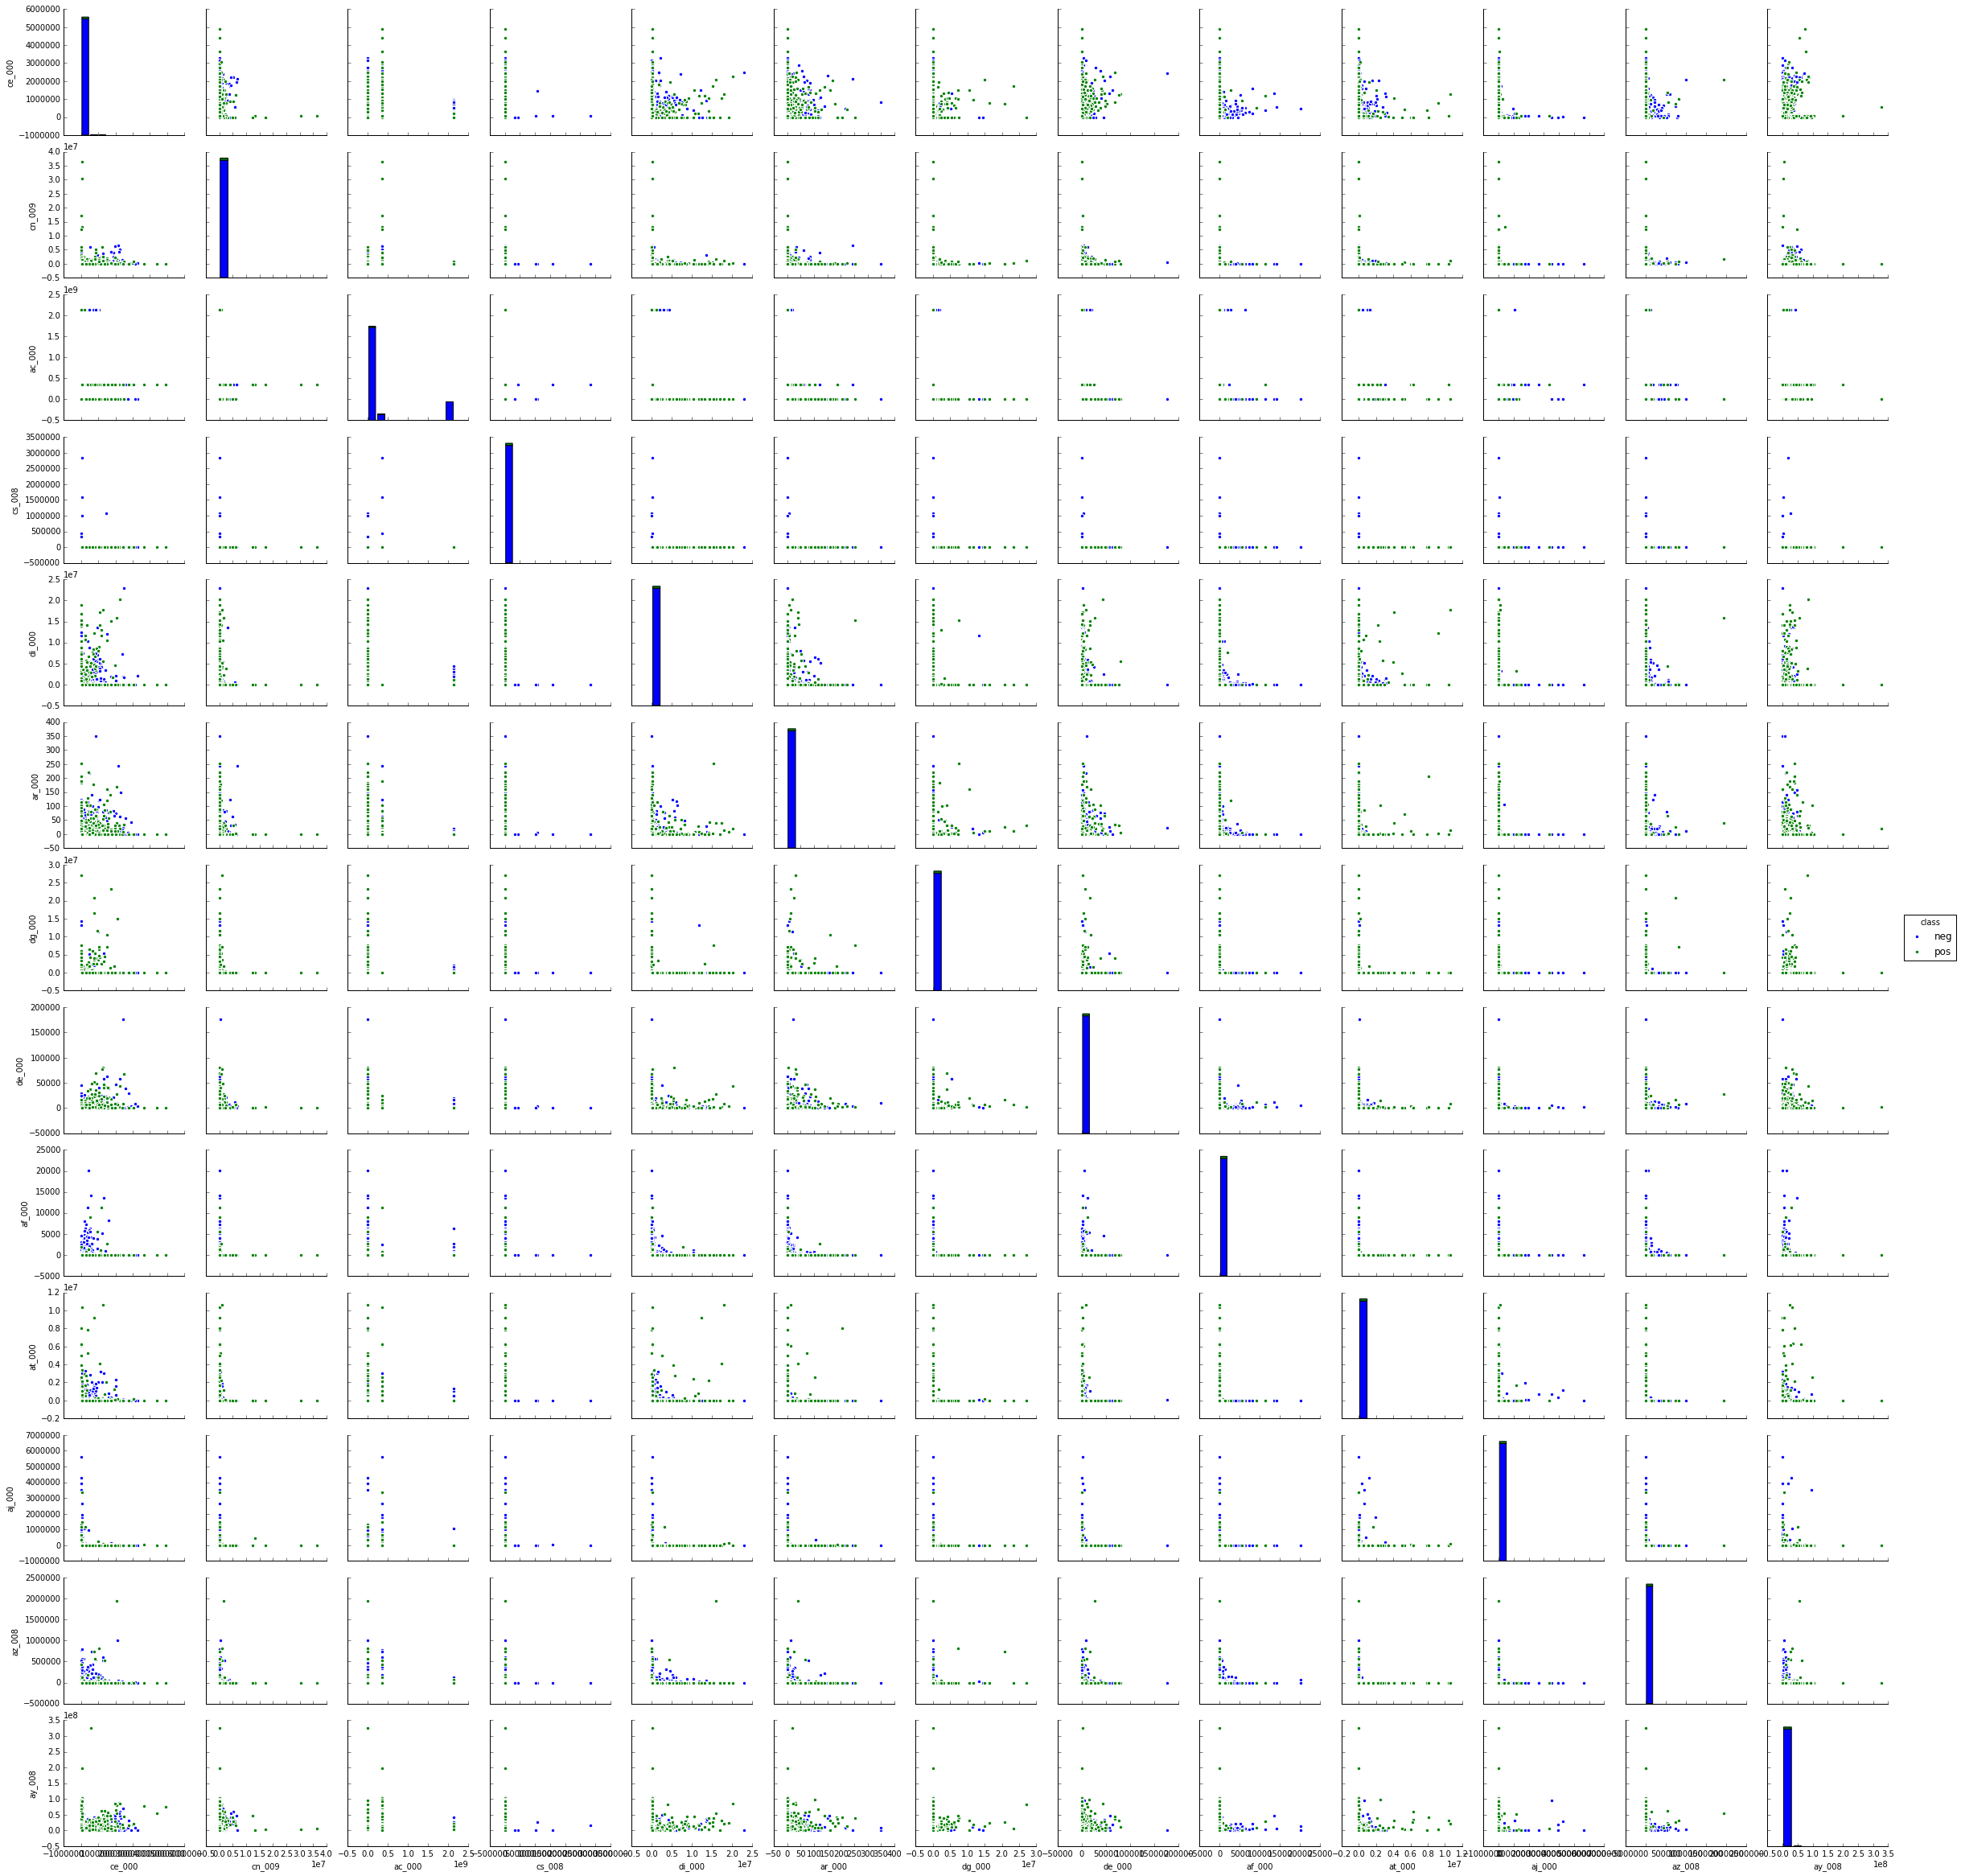

In [7]:
sns.pairplot(df_f,hue="class")

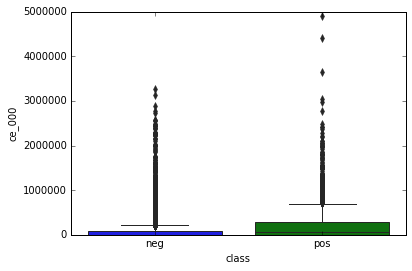

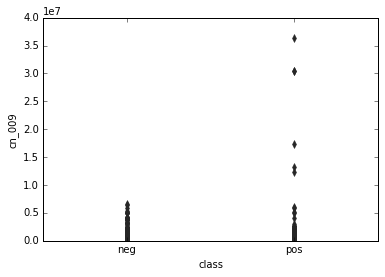

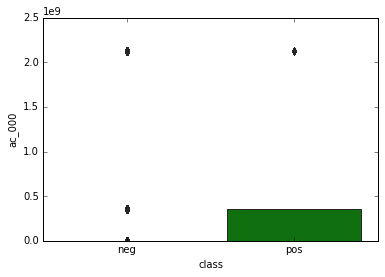

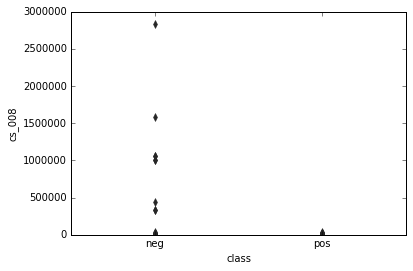

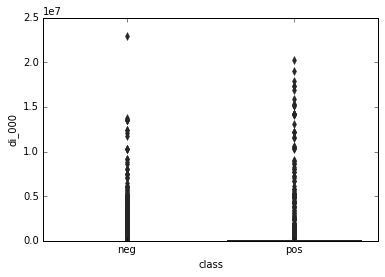

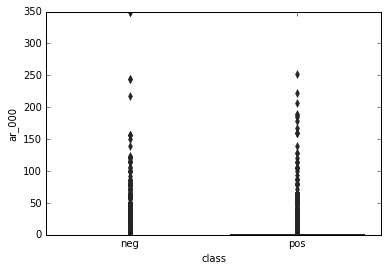

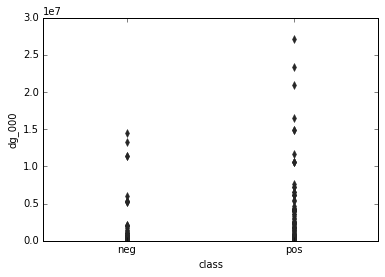

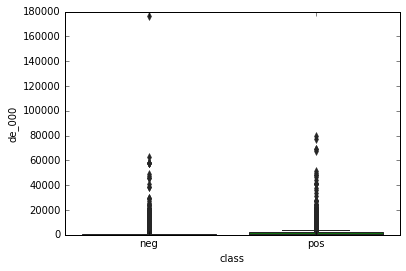

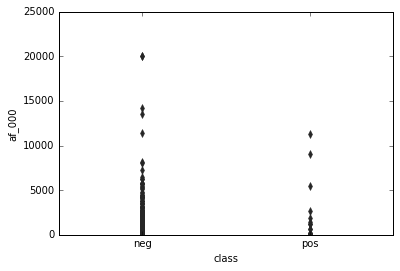

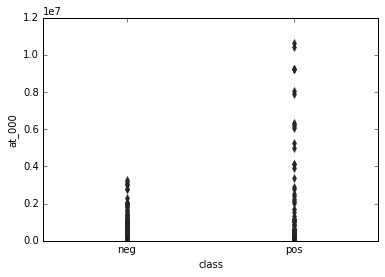

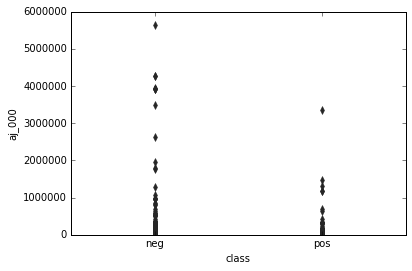

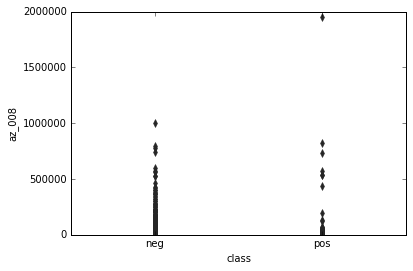

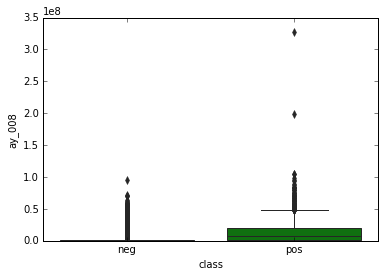

In [15]:
for i in range(0,13,1):
    fig,axes=plt.subplots(1,1,sharey=True)
    sns.boxplot(x="class", y=df_f.columns.values[i], data=df_f)

## (b)
### v:Determine the number of positive and negative data
### Yes the data set is imbalanced.

In [16]:
#(b):v: Determine the number of positive and negative data
#Yes the data set is imbalanced
ss = df_f["class"]    
ss.value_counts() 

neg    74625
pos     1375
Name: class, dtype: int64

## (c) :Train a random forest to classify the data set.

### We print the train,test confusion matrix and the misclassification rates.
#### Then we calculate the test error is 0.007937500000000042 and the OOB error rate is: 0.00649999999999995
#### So the OOB error rate is a little bit smaller than the test error which is reasonable.

In [18]:
train = result1.iloc[:60000,:]
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
train.to_csv('wekatrain.csv',index=0)
test = result1.iloc[60000:,:]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,0]
test.to_csv("wekatest.csv",index=0)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, n_jobs=2,max_features=13)
rf.fit(x_train,y_train)
train_pre=rf.predict(x_train)
prob_train_pre=rf.predict_proba(x_train)
#print(prob_train_pre)
pre_train =prob_train_pre[:,0]
y_train1=y_train.replace('pos',0,regex=True)
y_train1=y_train1.replace('neg',1,regex=True)
print("*********\nThe confusion matrix in the train set:***********\n")
print(pd.crosstab(y_train, train_pre, rownames=['train Actual classes'], colnames=['train Predicted classes']))
print("*********\nThe misclassification for the training set:")
error = 1-accuracy_score(y_train, train_pre)
print(error)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


*********
The confusion matrix in the train set:***********

train Predicted classes    neg   pos
train Actual classes                
neg                      59000     0
pos                          0  1000
*********
The misclassification for the training set:
0.0


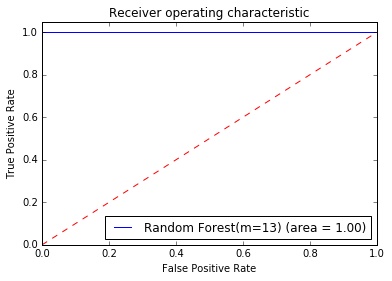

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train1,pre_train)
fpr, tpr, thresholds = roc_curve(y_train1,pre_train)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest(m=13) (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
test_pre = rf.predict(x_test)
print("*********\nThe confusion matrix in the test set:***********\n")
print(pd.crosstab(y_test, test_pre, rownames=['Test Actual classes'], colnames=['Test Predicted classes']))
print("*********\nThe misclassification for the test set:")
error_test = 1-accuracy_score(y_test, test_pre)
print(error_test)

*********
The confusion matrix in the test set:***********

Test Predicted classes    neg  pos
Test Actual classes               
neg                     15609   16
pos                       108  267
*********
The misclassification for the test set:
0.007750000000000035


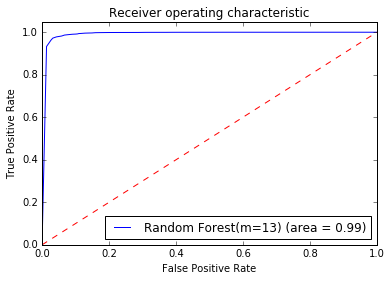

In [22]:
prob_test_pre=rf.predict_proba(x_test)
#print(prob_train_pre)
pre_test =prob_test_pre[:,0]
y_test1=y_test.replace('pos',0,regex=True)
y_test1=y_test1.replace('neg',1,regex=True)
logit_roc_auc = roc_auc_score(y_test1,pre_test)
fpr, tpr, thresholds = roc_curve(y_test1,pre_test)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest(m=13) (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [23]:
rf1 = RandomForestClassifier(n_estimators=50, n_jobs=2,max_features=13,oob_score=True)
rf1.fit(x_train,y_train)
train_pre_oob=rf1.predict(x_train)
print("The oob error is:",1-rf1.oob_score_)

The oob error is: 0.006266666666666643


## (d)Compensate for class imbalance
### According to the reasearch I have done,When using RandomForestClassifier a useful setting is class_weight=balanced 
### wherein classes are automatically weighted inversely proportional to how frequently they appear in the data.
### wj = n/knj,wj is the weight to class j, n is the number of observations, 
### nj is the number of observations in class j, and k is the total number of classes.

### Compare with the random forest without the balanced class. The train error is similar.
### But the test error here in the balanced class is not that good, the error rate is 0.0113 comparing with the 0.0079 above.

In [25]:
#calculate the train error
rf2 = RandomForestClassifier(n_estimators=50, n_jobs=2,max_features=13,class_weight="balanced")
rf2.fit(x_train,y_train)
prob_train_pre2=rf2.predict_proba(x_train)
pre_train2 =prob_train_pre2[:,0]
print("*********\nThe confusion matrix in the train set:***********\n")
print(pd.crosstab(y_train, train_pre, rownames=['train Actual classes'], colnames=['train Predicted classes']))
print("*********\nThe misclassification for the training set:")
error = 1-accuracy_score(y_train, train_pre)
print(error)

*********
The confusion matrix in the train set:***********

train Predicted classes    neg   pos
train Actual classes                
neg                      59000     0
pos                          0  1000
*********
The misclassification for the training set:
0.0


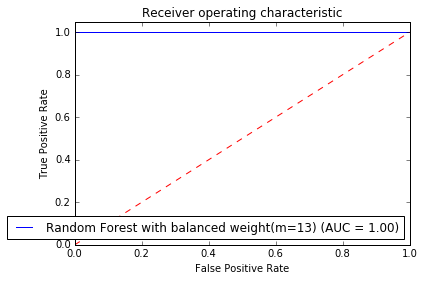

In [26]:
logit_roc_auc = roc_auc_score(y_train1,pre_train2)
fpr, tpr, thresholds = roc_curve(y_train1,pre_train2)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest with balanced weight(m=13) (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [27]:
#Calculate the test error
test_pre2 = rf2.predict(x_test)
print("*********\nThe confusion matrix in the test set:***********\n")
print(pd.crosstab(y_test, test_pre2, rownames=['Test Actual classes'], colnames=['Test Predicted classes']))
print("*********\nThe misclassification for the test set:")
error_test = 1-accuracy_score(y_test, test_pre2)
print(error_test)

*********
The confusion matrix in the test set:***********

Test Predicted classes    neg  pos
Test Actual classes               
neg                     15610   15
pos                       163  212
*********
The misclassification for the test set:
0.011125000000000052


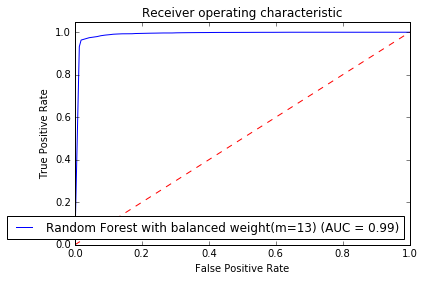

In [28]:
prob_test_pre2=rf2.predict_proba(x_test)
#print(prob_train_pre)
pre_test2 =prob_test_pre2[:,0]
logit_roc_auc = roc_auc_score(y_test1,pre_test2)
fpr, tpr, thresholds = roc_curve(y_test1,pre_test2)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest with balanced weight(m=13) (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
rf4 = RandomForestClassifier(n_estimators=50, n_jobs=2,max_features=13,class_weight="balanced",oob_score=True)
rf4.fit(x_train,y_train)
train_pre_oob=rf4.predict(x_train)
print("The oob error is:",1-rf4.oob_score_)

The oob error is: 0.008316666666666639


## (e)Model trees
### Use weka to train logistic regression

In [32]:
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/anaconda3/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/anaconda3/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/anaconda3/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Launching VM in non-python thread
DEBUG:javabridge.jutil:Attaching to VM in monitor thread
DEBUG:javabridge.jutil:Signalling caller


In [33]:
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")
testdata = loader.load_file("wekatest.arff")

In [34]:
traindata = loader.load_file("wekatrain.arff")

In [35]:
testdata.class_is_first()
traindata.class_is_first()

In [36]:
# import weka.core.converters as converters
# data = converters.load_any_file("iris.arff")
# data.class_is_last()
from weka.core.converters import Loader
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.LMT")
from weka.classifiers import Evaluation
from weka.core.classes import Random



### The Train dataset in weka using 5 fold
### Report the Confusion Matrix, ROC, and AUC for training 

In [38]:
cls1 = Classifier(classname="weka.classifiers.trees.LMT")
from weka.classifiers import Evaluation
from weka.core.classes import Random
evl1 = Evaluation(traindata)
evl1.crossvalidate_model(cls, traindata, 5, Random(1))



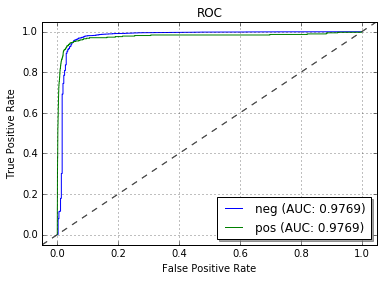

In [43]:
import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_roc(evl, class_index=[0, 1], wait=True)


[[58854.   146.]
 [  345.   655.]]
99.18166666666667

Correctly Classified Instances       59509               99.1817 %
Incorrectly Classified Instances       491                0.8183 %
Kappa statistic                          0.7233
Mean absolute error                      0.0116
Root mean squared error                  0.082 
Relative absolute error                 35.3465 %
Root relative squared error             64.0634 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.998    0.345    0.994      0.998    0.996      0.728    0.960     0.998     neg
                 0.655    0.002    0.818      0.655    0.727      0.728    0.960     0.750     pos
Weighted Avg.    0.992    0.339    0.991      0.992    0.991      0.728    0.960     0.994     



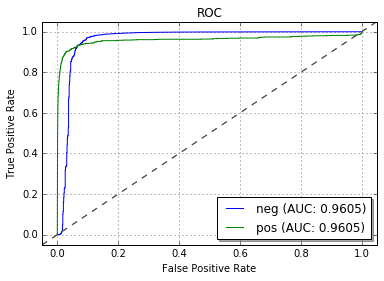

In [51]:
print(evl1.confusion_matrix)
print(evl1.percent_correct)
print(evl1.summary())
print(evl1.class_details())
plcls.plot_roc(evl1, class_index=[0, 1], wait=True)

In [8]:
# cls2 = Classifier(classname="weka.classifiers.trees.LMT")
# from weka.classifiers import Evaluation
# from weka.core.classes import Random
# evl2 = Evaluation(traindata)
# evl2.crossvalidate_model(cls, traindata, 10, Random(1))

In [9]:
# evl2 = Evaluation(traindata)
# pout = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
# evl2 = Evaluation(traindata)
# evl2.crossvalidate_model(cls, traindata, 5, Random(1), pout)

# print(evl2.summary())
# print(pout.buffer_content())

In [10]:
# print(evl2.confusion_matrix)
# print(evl2.percent_correct)
# print(evl2.summary())
# #print(evl2.class_details())
# # import weka.plot.classifiers as plcls  # NB: matplotlib is required
# # plcls.plot_classifier_errors(evl2.predictions, wait=True)
# #print(evl2.predictions)

In [11]:
# plcls.plot_roc(evl2, class_index=[0, 1], wait=True)

### The test dataset in weka using 5 fold
### Report the Confusion Matrix, ROC, and AUC for test data¶

In [67]:
#Use the crossvalidation model to fit the test data
#Then print the confusion matrix and ROC and AUC
cls_test = Classifier.make_copy(cls)
cls_test.build_classifier(traindata)
testresult=evl1.test_model(cls_test,testdata)

In [86]:
resulttest = pd.DataFrame(testresult)
resulttest = resulttest.replace('neg',0,regex=True)
resulttest = resulttest.replace('pos',1,regex=True)
y_test1 = y_test.replace('neg',0,regex=True)
y_test1 = y_test1.replace('pos',1,regex=True)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(resulttest.values.tolist(), y_test1.values.tolist())

print("******confusion Matrix we calculate:\n")
print(confusion_matrix)

[[15577   106]
 [   48   269]]


In [124]:
print("MSE in test data:",metrics.mean_squared_error(y_test1,resulttest))

MSE in test data: 0.009625


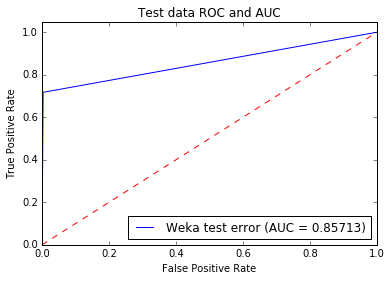

In [94]:
logit_roc_auc = roc_auc_score(y_test1, resulttest)
fpr, tpr, thresholds = roc_curve(y_test1, resulttest)
plt.figure()
plt.plot(fpr, tpr, label='Weka test error (AUC = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test data ROC and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## (f)Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data


In [ ]:
from imblearn.over_sampling import SMOTE
sme = SMOTE()
x_res, y_res = sme.fit_sample(x_train, y_train)

In [117]:
loader2 = Loader(classname="weka.core.converters.ArffLoader")
smote_traindata = loader.load_file("smote_train_data.arff")
smote_traindata.class_is_first()
# from weka.core.converters import Loader
# loader2 = Loader(classname="weka.core.converters.ArffLoader")
# smote_traindata = loader2.load_file("smote_train_data.arff")
# smote_traindata.class_is_first()

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [118]:
cls = Classifier(classname="weka.classifiers.trees.LMT")
evl_smote = Evaluation(smote_traindata)
evl_smote.crossvalidate_model(cls, smote_traindata, 5, Random(1))

### The Train dataset in weka using 5 fold
### Report the Confusion Matrix, ROC, and AUC for training

In [119]:
print(evl_smote.confusion_matrix)
print(evl_smote.percent_correct)
print(evl_smote.summary())

[[58038.   962.]
 [  663. 58337.]]
98.62288135593221

Correctly Classified Instances      116375               98.6229 %
Incorrectly Classified Instances      1625                1.3771 %
Kappa statistic                          0.9725
Mean absolute error                      0.0221
Root mean squared error                  0.1077
Relative absolute error                  4.4295 %
Root relative squared error             21.5304 %
Total Number of Instances           118000     



In [121]:
cls_test_smote = Classifier.make_copy(cls)
cls_test_smote.build_classifier(smote_traindata)
testresult_smote=evl_smote.test_model(cls_test_smote,testdata)

### The test dataset in weka using 5 fold
### Report the Confusion Matrix, ROC, and AUC for test data¶

In [140]:
testresult_smote1 = pd.DataFrame(testresult_smote)
testresult_smote1 = testresult_smote1.replace('neg',0,regex=True)
testresult_smote1 = testresult_smote1.replace('pos',1,regex=True)
y_test2 = y_test.replace('neg',0,regex=True)
y_test2 = y_test2.replace('pos',1,regex=True)
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(testresult_smote1.values.tolist(), y_test2.values.tolist())
print("******confusion Matrix we calculate:")
print(confusion_matrix1)

print("\nMSE in test data:",metrics.mean_squared_error(y_test1,testresult_smote1))

******confusion Matrix we calculate:
[[15473    72]
 [  152   303]]

MSE in test data: 0.014


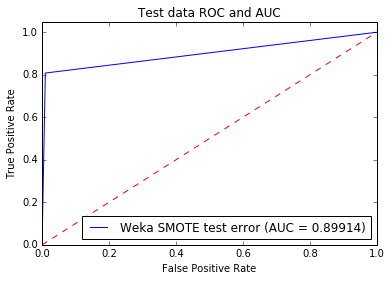

In [129]:
logit_roc_auc = roc_auc_score(y_test1, testresult_smote1)
fpr, tpr, thresholds = roc_curve(y_test1, testresult_smote1)
plt.figure()
plt.plot(fpr, tpr, label='Weka SMOTE test error (AUC = %0.5f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test data ROC and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [104]:
jvm.stop()